In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.spatial import ConvexHull
import scanpy.external as sce
import scanpy as sc
import scipy
from scipy.spatial.distance import pdist, squareform

from importlib import reload

# locals
import utils as ut
import plotting as plt2

# load BJ Fib data

In [2]:
# load BJ data
bj = pd.read_csv("/nfs/turbo/umms-indikar/shared/projects/R01/BJ_FIB_GENES.csv")
bj = bj.sort_values(by='tpm', ascending=False)
print(f"{bj.shape=}")

bj.head()

bj.shape=(19129, 5)


,gene_name,tpm,log_tpm,rank,is_panglao_marker
0,TMSB10,45584.16,10.727338,1.0,False
1,S100A6,35129.31,10.466820,2.0,False
2,LGALS1,22412.13,10.017402,3.0,False
3,TMSB4X,15365.34,9.639935,4.0,False
4,MYL6,14625.02,9.590557,5.0,False


# Load iHSC data

In [3]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/scanpy/hsc_landscape.anndata.h5ad"

adata = sc.read_h5ad(fpath)
adata.var_names = adata.var['gene_name'].values
adata

AnnData object with n_obs × n_vars = 54347 × 19070
    obs: 'n_counts', 'cell_type', 'dataset', 'organ_tissue', 'n_genes', 'new_cluster', 'cell_label', 'cluster_str', 'UMAP 1', 'UMAP 2'
    var: 'gene_name', 'ensemble_id', 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'B_mem', 'B_naive', 'Baso', 'DC', 'Endo', 'Eos', 'Ery', 'Fibro', 'HSC', 'Macro', 'Mega', 'Mono', 'MDSC', 'Neut', 'Osteo', 'Plasma', 'pDC', 'Retic', 'Stromal', 'cluster_genes'
    uns: 'cell_type_colors', 'dataset_colors', 'go_annotations', 'hvg', 'log1p', 'neighbors', 'new_cluster', 'new_cluster_colors', 'organ_tissue_colors', 'panglaodb', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log_norm', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [4]:
adata.var_names[:10]

Index(['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A3GALT2', 'A4GALT', 'A4GNT', 'AAAS',
       'AACS', 'AADAC'],
      dtype='object')

In [5]:
# Combine the expression
common_genes = set(bj['gene_name'].to_list())& set(adata.var_names)  
common_genes_list = list(common_genes) 
print("Shared genes: ", len(common_genes_list))

Shared genes:  18707


In [6]:
ts_fb = adata[adata.obs['cell_type'] == 'FB', :]

result = []

for tissue, group in ts_fb.obs.groupby('organ_tissue'):
    X = ts_fb[group.index, :].copy().to_df()
    
    X = X.mean(axis=0).reset_index()
    X.columns = ['gene_name', tissue]
    
    X = pd.merge(X, bj)
    
    # all correlation
    r, pval = scipy.stats.pearsonr(
        X[tissue].values, 
        X['log_tpm'].values,
    )
    
    row = {
        'tissue' : tissue.replace("_", " "),
        'r' : r,
        'pval' : pval,
    }
    result.append(row)

result = pd.DataFrame(result)
print(result)

/tmp/ipykernel_3475092/620029064.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for tissue, group in ts_fb.obs.groupby('organ_tissue'):


            tissue         r  pval
0          Bladder  0.589222   0.0
1              Fat  0.583044   0.0
2  Large Intestine  0.512775   0.0
3         Prostate  0.548118   0.0
4  Small Intestine  0.541455   0.0
5           Thymus  0.615230   0.0
6           Tongue  0.539387   0.0
7          Trachea  0.615546   0.0
8      Vasculature  0.607784   0.0


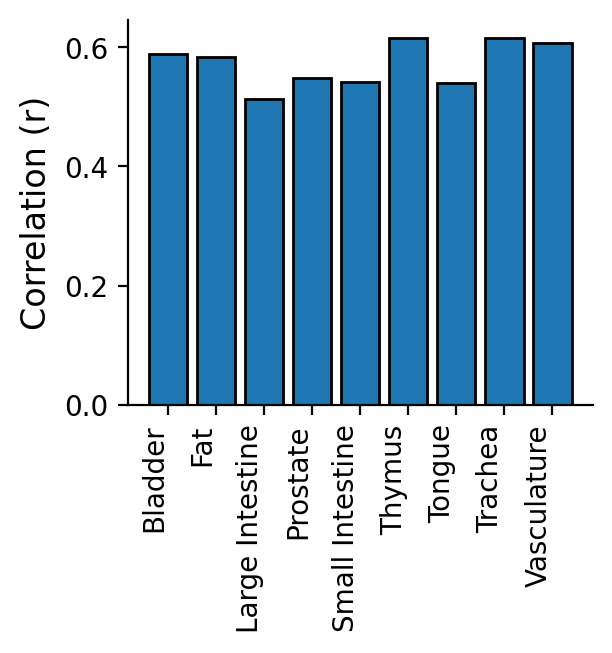

In [7]:
# Create the bar plot with error bars
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 2.5
plt.bar(
    result['tissue'], 
    result['r'],
    ec='k',
) 

# Add labels and title
plt.xlabel("")
plt.ylabel("Correlation (r)", fontsize=12)

# Rotate x-axis labels if they overlap
plt.xticks(rotation=90, ha="right")  
    
sns.despine()
plt.show()

In [8]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)